# Supervised Learning: 

### Part of Machine Learning For Chemists

**Only run this code if you haven't followed the instructions in the readme! If you got the conda environment working using the .yml file, you do nto need to do this*

Before running this docuemnt you need to install tensorflow (Sorry!)

Probably not needed on a newish install!

 `conda upgrade conda`
 
 `conda upgrade --all`

create a new environment and install CPU version of tensorflow:

 `conda create -n tf tensorflow jupyter nb_conda`

switch to it:

 `conda activate tf`

add required moduiles:

 `pip install matplotlib pillow`

start an environment:

 `jupyter notebook`

This checks that your install is working well.

In [1]:
import sys
print(sys.path)

['/Users/Joie/BSc Project/Machine_learning_for_chemists', '/opt/anaconda3/envs/tf/lib/python310.zip', '/opt/anaconda3/envs/tf/lib/python3.10', '/opt/anaconda3/envs/tf/lib/python3.10/lib-dynload', '', '/opt/anaconda3/envs/tf/lib/python3.10/site-packages', '/opt/anaconda3/envs/tf/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-macosx-10.9-x86_64.egg', '/opt/anaconda3/envs/tf/lib/python3.10/site-packages/PyYAML-6.0-py3.10-macosx-10.9-x86_64.egg']


In [2]:
import tensorflow as tf
print("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.9.1


**Important** Don't try to understand everything that this code does. This is bleeding edge whistle-stop tour designed to show you what is and isn't possible, not to teach you how to make a neural network! 

Import some stuff. Keras is the nice front end for TensorFlow, TensorFlow is the library for neural networks, this is what google runs its machine learning systems on.

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

import numpy as np
import matplotlib as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt
%matplotlib inline

import PIL
from IPython.display import display

This gets the labels for photos. The NN just outputs a vector of numbers and we need these labels in order to understand the images.

In [4]:
#labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
#imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels = np.array(open('NNdata/ImageNetLabels.txt').read().splitlines())

# Classification

Neural networks can be used a **function approximators** or **pattern matchers**, but they have been very sucessful in **classification** problems. 

Regression models are supervised learning for **continuous** data, where we have data, we fit a **model** to it and we want to predict an output value. 

Neural networks can be used as supervised learning for **discrete** data, where we have a datapoint and we want to classify it, based on what we know about the data and the world in general.

In this notebook you will do some classifications with neural networks. 

Like in multivariate regression, we learn from a dataset X. For image recognition, that dataset is called ImageNet and containes 1.3 million example photos from 1000 categories. This data is chopped up and manipulated (i.e. crops are taken and the images are flipped) and this makes many times more data. Each image is labelled with the object the image contains. The data are messy and badly labelled, but there is a lot of it (due to all those human volunteers putting their pictures on flickr!). **Deep-neural networks require vast amounts of labelled data: big data**

In this section we are going to download the pre-trained models and test them out on some data. 

This loads a few pretrained NN models. Inception_v3 is the famous deep-NN from google you may have heard of. Vgg19 is a nice standard model.

In [5]:
#import keras
#import numpy as np
from tensorflow.keras.applications import vgg19, inception_v3, resnet50, mobilenet
from tensorflow.keras.applications import vgg16
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
#resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

2022-11-07 13:02:55.119986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


17225924/17225924 [==============================] - 41s 2us/step


What we're going to do is load in some images and see how well the NNs do at classifying the images. (This code also reshapes the image so it will fit into the NN, don't worry about this). 


numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


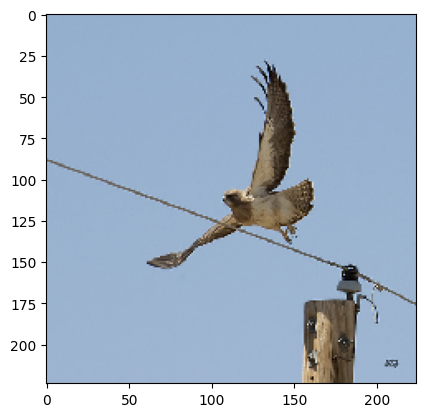

In [7]:
# This loads in an image from the folder NNdata -- make sure you have it!
filename = 'NNdata/pure_images/ILSVRC2012_val_00001218.JPEG'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

This chunk of code will pre-process the image, and then asks the `vgg_model` to predict the classes for the image. This is the same as we did for the multivariate regression, except now our data is columns of pixels. The output `predictions` is a 1000-unit long vector telling you that chance that each of the 1000 classes is present in the image. We then take the top-5 highest probabilities (which I've chosen to present as percentages) and see if we agree with the NN.

In [8]:
# prepare the image for the VGG model
processed_image = vgg19.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions

#_ = plt.title("Prediction: " + predicted_class_name.title())
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
predicted_top_5 = tf.keras.applications.vgg16.decode_predictions(predictions)[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

print("Rank\tprobability\tname")
for i in range(5):
    item = predicted_top_5[i]
    print("{}.\t {:.2f}%\t\t{}".format(i+1, item[2]*100, item[1]))

35363/35363 [==============================] - 0s 1us/step
Rank	probability	name
1.	 25.14%		kite
2.	 24.98%		pole
3.	 9.87%		vulture
4.	 6.74%		bald_eagle
5.	 4.42%		great_grey_owl


You'll probably agree with the NN that there is both some sort of bird (that could be a kite) in the image and a pole. 

You can change the file name in the above code and put in your own photos if you want to test out the NN.

In [9]:
# list of files in the pure directory
File_list_pure=["ILSVRC2012_val_00001079.JPEG",
"ILSVRC2012_val_00001218.JPEG",
"ILSVRC2012_val_00001671.JPEG",
"ILSVRC2012_val_00003109.JPEG",
"ILSVRC2012_val_00003594.JPEG",
"ILSVRC2012_val_00003632.JPEG",
"ILSVRC2012_val_00003866.JPEG",
"ILSVRC2012_val_00004187.JPEG",
"ILSVRC2012_val_00004255.JPEG", 
"ILSVRC2012_val_00004472.JPEG",
"ILSVRC2012_val_00004613.JPEG",
"ILSVRC2012_val_00004756.JPEG",
"ILSVRC2012_val_00004920.JPEG",
"ILSVRC2012_val_00005287.JPEG",
"ILSVRC2012_val_00005747.JPEG",
"ILSVRC2012_val_00005847.JPEG", 
"ILSVRC2012_val_00006432.JPEG",
"ILSVRC2012_val_00006632.JPEG", 
"ILSVRC2012_val_00006722.JPEG", 
"ILSVRC2012_val_00007058.JPEG",
"ILSVRC2012_val_00007307.JPEG",
"ILSVRC2012_val_00009208.JPEG",
"ILSVRC2012_val_00009396.JPEG",
"ILSVRC2012_val_00009581.JPEG",
"ILSVRC2012_val_00011045.JPEG",
"ILSVRC2012_val_00012630.JPEG",
"ILSVRC2012_val_00013772.JPEG",
"ILSVRC2012_val_00014336.JPEG"]
print("The number of files is", len(File_list_pure))

The number of files is 28


**Exercise** Run the code below, and count how many of the images you think are correct, in that one of the top-5 labels in truely in the picture (do not score more than 1 item per image, so if there are two labels that match the image, that still counts as 1), then calculate the **top-5** accuracy on this test set.

Then count the **top-1** accuracy, this time, give the NN a score of 1 if and only if the first class it suggests is in the picture. Record the top-1 accuracy below. 

This is how NNs are scored in competetions. 

Picture 1


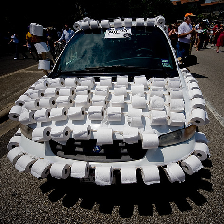

1/1 [==============================] - 0s 374ms/step
Rank	probability	name - picture 1
1.	 53.13%		folding_chair
2.	 7.87%		golf_ball
3.	 4.67%		maze
4.	 3.76%		computer_keyboard
5.	 3.71%		golfcart
Picture 2


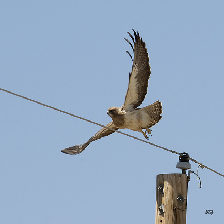

1/1 [==============================] - 1s 763ms/step
Rank	probability	name - picture 2
1.	 25.14%		kite
2.	 24.98%		pole
3.	 9.87%		vulture
4.	 6.74%		bald_eagle
5.	 4.42%		great_grey_owl
Picture 3


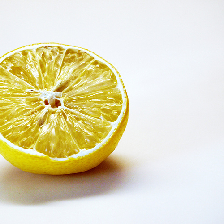

1/1 [==============================] - 1s 528ms/step
Rank	probability	name - picture 3
1.	 85.72%		lemon
2.	 14.28%		orange
3.	 0.00%		fig
4.	 0.00%		spaghetti_squash
5.	 0.00%		banana
Picture 4


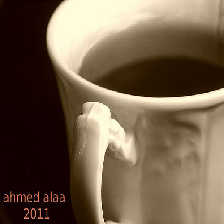

1/1 [==============================] - 1s 889ms/step
Rank	probability	name - picture 4
1.	 75.97%		coffee_mug
2.	 9.43%		cup
3.	 6.16%		pitcher
4.	 2.74%		espresso
5.	 0.80%		vase
Picture 5


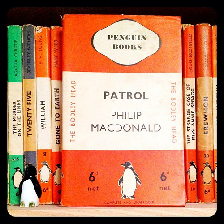

1/1 [==============================] - 1s 785ms/step
Rank	probability	name - picture 5
1.	 29.19%		bookcase
2.	 18.12%		rubber_eraser
3.	 15.54%		pencil_sharpener
4.	 9.30%		pencil_box
5.	 9.06%		bookshop
Picture 6


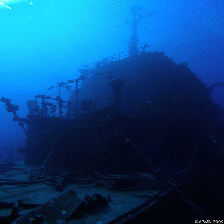

1/1 [==============================] - 1s 1s/step
Rank	probability	name - picture 6
1.	 75.38%		wreck
2.	 9.39%		scuba_diver
3.	 2.19%		alp
4.	 1.73%		lakeside
5.	 0.86%		coral_reef
Picture 7


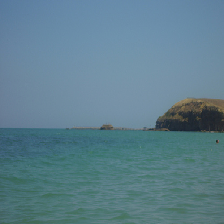

1/1 [==============================] - 1s 833ms/step
Rank	probability	name - picture 7
1.	 31.59%		sandbar
2.	 26.30%		promontory
3.	 14.51%		seashore
4.	 6.79%		wreck
5.	 4.09%		lakeside
Picture 8


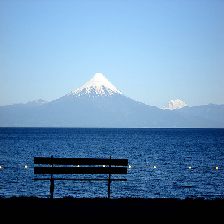

1/1 [==============================] - 1s 965ms/step
Rank	probability	name - picture 8
1.	 91.18%		lakeside
2.	 5.19%		volcano
3.	 1.15%		seashore
4.	 0.65%		breakwater
5.	 0.26%		promontory
Picture 9


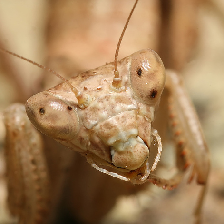

1/1 [==============================] - 1s 970ms/step
Rank	probability	name - picture 9
1.	 94.24%		mantis
2.	 2.69%		cricket
3.	 2.42%		grasshopper
4.	 0.45%		walking_stick
5.	 0.06%		harvestman
Picture 10


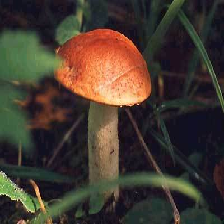

1/1 [==============================] - 1s 782ms/step
Rank	probability	name - picture 10
1.	 84.18%		bolete
2.	 13.55%		mushroom
3.	 1.93%		agaric
4.	 0.14%		stinkhorn
5.	 0.11%		earthstar
Picture 11


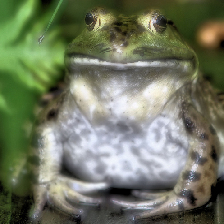

1/1 [==============================] - 1s 1s/step
Rank	probability	name - picture 11
1.	 73.33%		bullfrog
2.	 26.26%		tailed_frog
3.	 0.39%		tree_frog
4.	 0.02%		common_newt
5.	 0.00%		mud_turtle
Picture 12


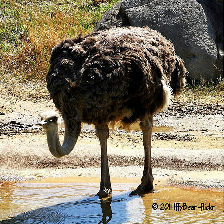

1/1 [==============================] - 1s 667ms/step
Rank	probability	name - picture 12
1.	 100.00%		ostrich
2.	 0.00%		llama
3.	 0.00%		bustard
4.	 0.00%		Arabian_camel
5.	 0.00%		crane
Picture 13


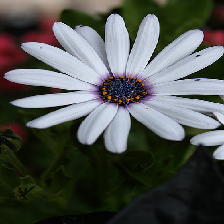

1/1 [==============================] - 1s 581ms/step
Rank	probability	name - picture 13
1.	 99.68%		daisy
2.	 0.09%		ant
3.	 0.05%		fly
4.	 0.02%		cup
5.	 0.02%		bee
Picture 14


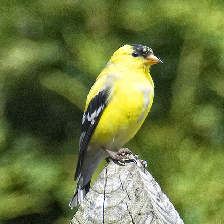

1/1 [==============================] - 1s 537ms/step
Rank	probability	name - picture 14
1.	 99.94%		goldfinch
2.	 0.05%		brambling
3.	 0.01%		indigo_bunting
4.	 0.00%		water_ouzel
5.	 0.00%		bulbul
Picture 15


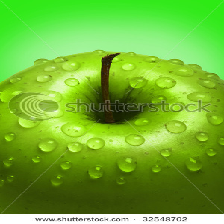

1/1 [==============================] - 1s 501ms/step
Rank	probability	name - picture 15
1.	 99.24%		Granny_Smith
2.	 0.47%		green_mamba
3.	 0.12%		candle
4.	 0.05%		green_snake
5.	 0.03%		vine_snake
Picture 16


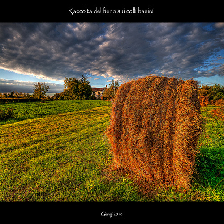

1/1 [==============================] - 0s 415ms/step
Rank	probability	name - picture 16
1.	 85.93%		hay
2.	 4.36%		television
3.	 2.08%		castle
4.	 1.68%		barn
5.	 1.63%		monitor
Picture 17


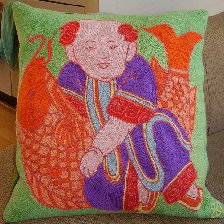

1/1 [==============================] - 0s 447ms/step
Rank	probability	name - picture 17
1.	 98.21%		pillow
2.	 0.54%		purse
3.	 0.22%		Christmas_stocking
4.	 0.19%		wallet
5.	 0.13%		mailbag
Picture 18


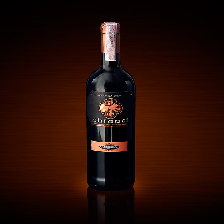

1/1 [==============================] - 0s 429ms/step
Rank	probability	name - picture 18
1.	 47.88%		red_wine
2.	 33.15%		wine_bottle
3.	 14.78%		beer_bottle
4.	 1.99%		pop_bottle
5.	 1.05%		microphone
Picture 19


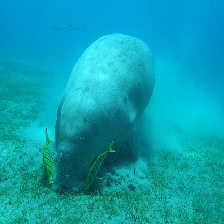

1/1 [==============================] - 0s 449ms/step
Rank	probability	name - picture 19
1.	 99.04%		dugong
2.	 0.27%		brain_coral
3.	 0.17%		ice_bear
4.	 0.13%		hippopotamus
5.	 0.10%		eel
Picture 20


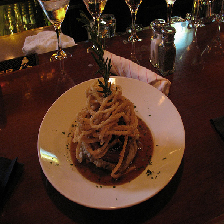

1/1 [==============================] - 0s 419ms/step
Rank	probability	name - picture 20
1.	 54.49%		carbonara
2.	 24.60%		plate
3.	 8.29%		dining_table
4.	 5.87%		restaurant
5.	 1.65%		consomme
Picture 21


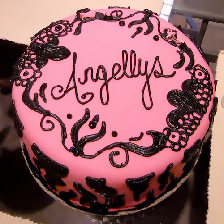

1/1 [==============================] - 1s 682ms/step
Rank	probability	name - picture 21
1.	 6.68%		mask
2.	 6.58%		red_wine
3.	 3.29%		vase
4.	 3.16%		coffee_mug
5.	 2.80%		crash_helmet
Picture 22


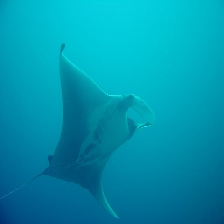

1/1 [==============================] - 1s 611ms/step
Rank	probability	name - picture 22
1.	 50.62%		electric_ray
2.	 21.72%		stingray
3.	 20.00%		hammerhead
4.	 3.34%		great_white_shark
5.	 3.17%		tiger_shark
Picture 23


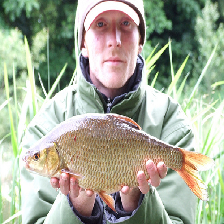

1/1 [==============================] - 1s 540ms/step
Rank	probability	name - picture 23
1.	 99.86%		tench
2.	 0.14%		barracouta
3.	 0.00%		jackfruit
4.	 0.00%		reel
5.	 0.00%		bolete
Picture 24


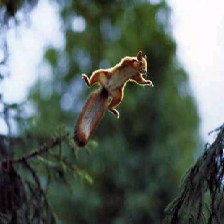

1/1 [==============================] - 1s 538ms/step
Rank	probability	name - picture 24
1.	 24.85%		acorn
2.	 15.26%		cicada
3.	 12.15%		mantis
4.	 9.47%		squirrel_monkey
5.	 3.47%		mushroom
Picture 25


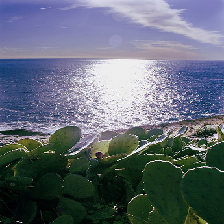

1/1 [==============================] - 1s 528ms/step
Rank	probability	name - picture 25
1.	 53.38%		lakeside
2.	 13.38%		coral_reef
3.	 13.23%		promontory
4.	 8.03%		seashore
5.	 4.24%		valley
Picture 26


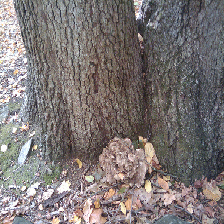

1/1 [==============================] - 0s 454ms/step
Rank	probability	name - picture 26
1.	 20.14%		hen-of-the-woods
2.	 7.42%		stone_wall
3.	 4.90%		hatchet
4.	 2.73%		mushroom
5.	 2.44%		coral_fungus
Picture 27


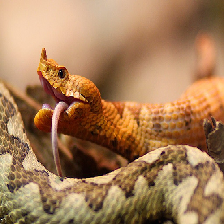

1/1 [==============================] - 0s 427ms/step
Rank	probability	name - picture 27
1.	 55.25%		horned_viper
2.	 33.25%		African_chameleon
3.	 8.86%		sidewinder
4.	 1.54%		agama
5.	 0.48%		banded_gecko
Picture 28


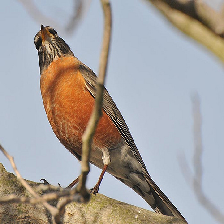

1/1 [==============================] - 0s 442ms/step
Rank	probability	name - picture 28
1.	 94.22%		robin
2.	 5.35%		brambling
3.	 0.19%		worm_fence
4.	 0.04%		quail
5.	 0.03%		partridge


In [10]:
c=0
prob_pure=[]
for this_file in File_list_pure:
    c=c+1
    # This loads in an image from the folder NNdata -- make sure you have it!
    filename = 'NNdata/pure_images/' + this_file
    # load an image in PIL format
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    print('Picture', c)
    img = PIL.Image.fromarray(np.uint8(image_batch[0]))
    display(img)
    # prepare the image for the VGG model
    processed_image = vgg19.preprocess_input(image_batch.copy())
    # get the predicted probabilities for each class
    predictions = vgg_model.predict(processed_image)
    predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(predictions)[0]
    [(class_name, prob) for (number, class_name, prob) in predicted_top_5]
    print("Rank\tprobability\tname - picture",c)
    for i in range(5):
        item = predicted_top_5[i]
        print("{}.\t {:.2f}%\t\t{}".format(i+1, item[2]*100, item[1]))
        if i == 0:
            prob_pure.append(item[2])


Top-5 Test Accuracy is :

In [13]:
top5test_acc = (26/28)*100
print(f"Top-5 Test Accuracy = ", top5test_acc)

Top-5 Test Accuracy =  92.85714285714286


Top-1 Test Accuracy is:

In [15]:
top1test_acc = (22/28)*100
top1test_acc

78.57142857142857

Now you've calcualated the test accuracy, see how sure the neural network was it was correct.

In [10]:
print('Probability of correctness is {:.2f} plus or minus {:.2f}'.format(100*np.mean(prob_pure), 100*np.std(prob_pure)/np.sqrt(28)))


Probability of correctness is 68.15 plus or minus 5.54


A problem with neural networks is that we do not really know how they work, but we know that they do not work in the same way as humans beings. 

For example, look at this picture, can you identify it?

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


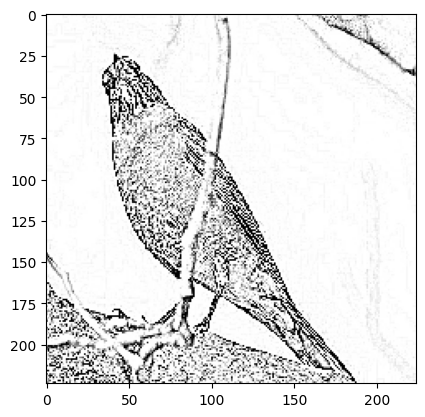

In [16]:
# This loads in an image from the folder NNdata -- make sure you have it!
filename = 'NNdata/b.JPEG/b.JPEG'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
numpy_image = img_to_array(original)
print('numpy array size',numpy_image.shape)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

This code gets the NN to predict the class for this image.

In [17]:
# prepare the image for the VGG model
processed_image = vgg19.preprocess_input(image_batch.copy())
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
#_ = plt.title("Prediction: " + predicted_class_name.title())
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
predicted_top_5 = tf.keras.applications.vgg16.decode_predictions(predictions)[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]
print("Rank\tprobability\tname")
for i in range(5):
    item = predicted_top_5[i]
    print("{}.\t {:.2f}%\t\t{}".format(i+1, item[2]*100, item[1]))

1/1 [==============================] - 0s 348ms/step
Rank	probability	name
1.	 29.61%		cloak
2.	 6.74%		gown
3.	 5.35%		mountain_tent
4.	 4.45%		ski
5.	 3.83%		picket_fence


The neural network cannot, even though it got it correct in when the colours were included. 

# Adversarial images

Proof that neural networks do not work like us is shown below with images designed to hack the neural networks.

Reference for this bit: Nguyen A, Yosinski J, Clune J. "Deep neural networks are easily fooled: High confidence predictions for unrecognizable images". In *Proceedings of the IEEE conference on computer vision and pattern recognition 2015* (pp. 427-436).

## Exercise 2. 
As before, count up the top-5 and top1 accuracy and write them down. How do they compare to the previous set of images?

Picture 1


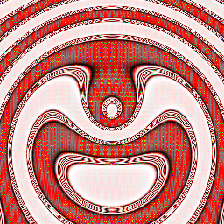

1/1 [==============================] - 1s 651ms/step
Rank	probability	name - picture 1
1.	 50.13%		coil
2.	 20.00%		shield
3.	 8.54%		maze
4.	 5.87%		altar
5.	 4.26%		vault
Picture 2


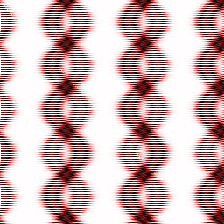

1/1 [==============================] - 0s 77ms/step
Rank	probability	name - picture 2
1.	 25.89%		doormat
2.	 6.14%		velvet
3.	 5.60%		window_screen
4.	 5.37%		microphone
5.	 5.18%		lampshade
Picture 3


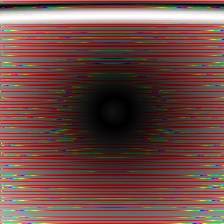

1/1 [==============================] - 0s 114ms/step
Rank	probability	name - picture 3
1.	 10.60%		desktop_computer
2.	 9.75%		loudspeaker
3.	 8.96%		West_Highland_white_terrier
4.	 7.19%		cassette
5.	 5.59%		shopping_basket
Picture 4


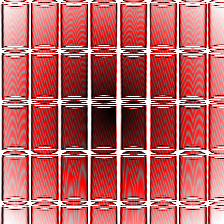

1/1 [==============================] - 0s 84ms/step
Rank	probability	name - picture 4
1.	 45.82%		sliding_door
2.	 11.91%		shoji
3.	 10.81%		crate
4.	 4.97%		vault
5.	 4.50%		cinema
Picture 5


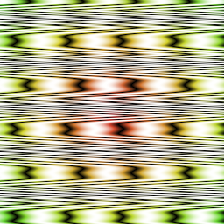

1/1 [==============================] - 0s 158ms/step
Rank	probability	name - picture 5
1.	 30.28%		grocery_store
2.	 17.01%		night_snake
3.	 10.32%		doormat
4.	 9.88%		space_heater
5.	 8.01%		shopping_cart
Picture 6


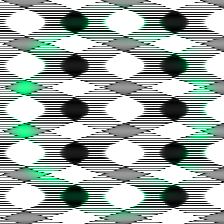

1/1 [==============================] - 0s 68ms/step
Rank	probability	name - picture 6
1.	 28.53%		knee_pad
2.	 5.85%		spatula
3.	 4.76%		crash_helmet
4.	 4.49%		basketball
5.	 3.39%		ping-pong_ball
Picture 7


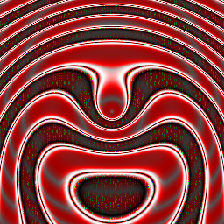

1/1 [==============================] - 0s 207ms/step
Rank	probability	name - picture 7
1.	 96.36%		maze
2.	 1.19%		shield
3.	 0.95%		buckle
4.	 0.53%		horned_viper
5.	 0.40%		sidewinder
Picture 8


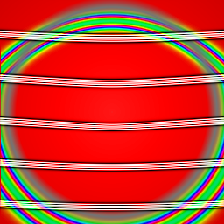

1/1 [==============================] - 0s 84ms/step
Rank	probability	name - picture 8
1.	 38.83%		crash_helmet
2.	 9.46%		grille
3.	 8.78%		perfume
4.	 6.02%		bucket
5.	 5.99%		balloon
Picture 9


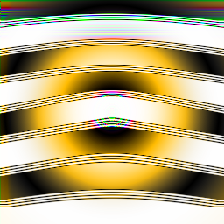

1/1 [==============================] - 0s 183ms/step
Rank	probability	name - picture 9
1.	 92.12%		grille
2.	 0.89%		car_wheel
3.	 0.80%		traffic_light
4.	 0.79%		crash_helmet
5.	 0.67%		recreational_vehicle
Picture 10


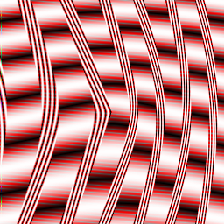

1/1 [==============================] - 0s 90ms/step
Rank	probability	name - picture 10
1.	 30.66%		plate_rack
2.	 24.88%		pick
3.	 18.77%		acoustic_guitar
4.	 4.74%		French_horn
5.	 3.41%		coil
Picture 11


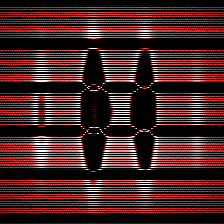

1/1 [==============================] - 0s 81ms/step
Rank	probability	name - picture 11
1.	 81.89%		window_shade
2.	 2.15%		violin
3.	 2.11%		bow_tie
4.	 1.74%		digital_clock
5.	 1.17%		electric_guitar
Picture 12


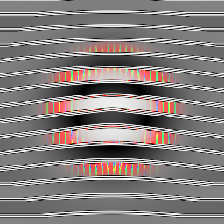

1/1 [==============================] - 0s 133ms/step
Rank	probability	name - picture 12
1.	 24.88%		traffic_light
2.	 21.26%		window_shade
3.	 17.11%		pole
4.	 9.09%		cinema
5.	 4.39%		lampshade
Picture 13


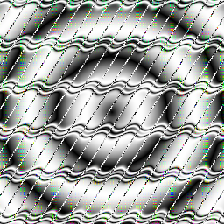

1/1 [==============================] - 0s 68ms/step
Rank	probability	name - picture 13
1.	 77.45%		chainlink_fence
2.	 10.10%		jigsaw_puzzle
3.	 3.54%		window_screen
4.	 1.45%		tray
5.	 1.09%		chain_mail
Picture 14


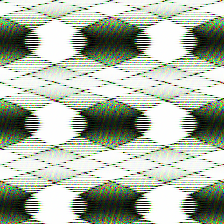

1/1 [==============================] - 0s 171ms/step
Rank	probability	name - picture 14
1.	 40.67%		Madagascar_cat
2.	 14.06%		West_Highland_white_terrier
3.	 6.21%		dalmatian
4.	 5.89%		skunk
5.	 4.21%		window_shade
Picture 15


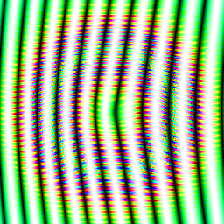

1/1 [==============================] - 0s 201ms/step
Rank	probability	name - picture 15
1.	 58.65%		strainer
2.	 16.83%		coil
3.	 4.49%		wool
4.	 2.05%		screw
5.	 1.70%		window_screen
Picture 16


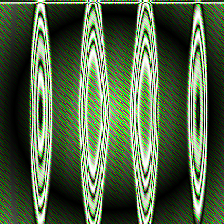

1/1 [==============================] - 0s 81ms/step
Rank	probability	name - picture 16
1.	 88.38%		quill
2.	 1.81%		coil
3.	 0.87%		safety_pin
4.	 0.83%		corn
5.	 0.75%		folding_chair


In [18]:
c=0
prob_fool=[]
for this_file in range(16):
    c=c+1
    # This loads in an image from the folder NNdata -- make sure you have it!
    filename = 'NNdata/fool_images/' + str(this_file + 1) + '.png'
    # load an image in PIL format
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    print('Picture', c)
    img = PIL.Image.fromarray(np.uint8(image_batch[0]))
    display(img)
    #f=plt.figure()
    #plt.imshow(np.uint8(image_batch[0]))
    #f.canvas.draw_idle()
    # prepare the image for the VGG model
    processed_image = mobilenet.preprocess_input(image_batch.copy())
    # get the predicted probabilities for each class
    predictions = mobilenet_model.predict(processed_image)
    predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(predictions)[0]
    [(class_name, prob) for (number, class_name, prob) in predicted_top_5]
    print("Rank\tprobability\tname - picture",c)
    for i in range(5):
        item = predicted_top_5[i]
        print("{}.\t {:.2f}%\t\t{}".format(i+1, item[2]*100, item[1]))
        if i == 0:
            prob_fool.append(item[2])

Top-5 Test Accuracy is :

Top-1 Test Accuracy is:

Now you've calcualated the test accuracy, see how sure the neural network was it was correct.

In [14]:
print('Probability of correctness is {:.2f} plus or minus {:.2f}'.format(100*np.mean(prob_fool), 100*np.std(prob_fool)/np.sqrt(28)))


Probability of correctness is 51.32 plus or minus 5.05


## Conclusion

So, neural networks give a very high certainty to images which are not images of objects and are thus easy to fool. 

It sees they pay attention to small and local features, colour and texture, rather than the overall shape. 

The problem is, it is easy to see that the neural network answers are wrong in the visual realm, it would not be as easy to spot an error like this in a quantum chemistry approximation.

# Training a neural network: the effect of dataset size

This section will train a neural network on a set of data called MNIST, which is a database of 60,000 images of handwritten digits. (If you ever wondered how letters got to you, this is how automated postcode readers work). 

In [21]:
# epoch is a step, and we will train for 10 epochs.
epochs = 10

This gets the mnist data and sets up the test and train datasets.

In [20]:
batch_size = 128
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 6s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


This code prints out the first 10 digits as an example of the dataset. 

In [22]:
for i in range(10):
    img = PIL.Image.fromarray(x_train[i].reshape((28,28)))
    display(img)

Now, we'll make a training set of only 1000 images, that should be more than enough, right?

In [23]:
x_train_small=x_train[0:1000]
y_train_small=y_train[0:1000]

This section sets up the neural network model. This uses keras, which writes the tensorflow code for you. (It is possible to write the tensorflow code yourself, but it is much more fiddly so I wouldn't recommend it!)

In [24]:
# instantiates the model
model = Sequential()
# bottom layer takes in the pictures, and does a convolution on them to look for edges
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
# second layers takes in the output of the first and does a convolution on that data
model.add(Conv2D(64, (3, 3), activation='relu'))
# max pooling, we take the largest number of the convolutions
model.add(MaxPooling2D(pool_size=(2, 2)))
# dropout - some neurons are randomly removed during training as this reduces overtraining!
model.add(Dropout(0.25))
# changes the shape of the output - don't worry about this, it's just reshaping the data
model.add(Flatten())
# third layer, we add 128 feed-forward neurons
model.add(Dense(128, activation='relu'))
# tehy're droped out randomly as well!
model.add(Dropout(0.5))
# we use the softmax activation on the output 
model.add(Dense(num_classes, activation='softmax'))

Unlike the regularisation models, neural networks are a bit more complex. This sets up the **loss function** which tells the NN how bad the error is, choses the optimiser and tells the NN to measure accuracy.

In [25]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

This is the bit where it does the fit. Unlike the regression models we ran yesterday, fitting a deep NN takes a long time. 

In [26]:
# Fits the NN to the input data (train and validation)
model.fit(x_train_small, y_train_small,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
# This scores the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: {:.2f}%'.format(score[1]*100))

Epoch 1/10
8/8 [==============================] - 6s 740ms/step - loss: 34.9933 - accuracy: 0.1030 - val_loss: 20.1718 - val_accuracy: 0.0711
Epoch 2/10
8/8 [==============================] - 5s 738ms/step - loss: 34.6683 - accuracy: 0.0940 - val_loss: 19.1088 - val_accuracy: 0.0783
Epoch 3/10
8/8 [==============================] - 5s 717ms/step - loss: 32.2043 - accuracy: 0.1080 - val_loss: 18.2158 - val_accuracy: 0.0827
Epoch 4/10
8/8 [==============================] - 6s 742ms/step - loss: 32.6299 - accuracy: 0.1010 - val_loss: 17.3757 - val_accuracy: 0.0893
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 31.5614 - accuracy: 0.1040 - val_loss: 16.6524 - val_accuracy: 0.0961
Epoch 6/10
8/8 [==============================] - 7s 919ms/step - loss: 30.2596 - accuracy: 0.1150 - val_loss: 16.0407 - val_accuracy: 0.1024
Epoch 7/10
8/8 [==============================] - 6s 886ms/step - loss: 30.8456 - accuracy: 0.1030 - val_loss: 15.3772 - val_accuracy: 0.1085
Epoch 8/1

Watch the a loss improve with epoch (on the training set), and val_loss is the loss on the validation set, the val_acc is the accuracy on the validation set, the acc is the accracy on the trianing set. 

That;s OK, but not great, let's see what happens when we use all the data.

In [27]:
# lets try using ALL the data
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: {:.2f}%'.format(score[1]*100))

Epoch 1/10
469/469 [==============================] - 249s 531ms/step - loss: 18.3287 - accuracy: 0.1696 - val_loss: 2.8431 - val_accuracy: 0.4862
Epoch 2/10
469/469 [==============================] - 156s 332ms/step - loss: 8.3427 - accuracy: 0.2721 - val_loss: 1.4587 - val_accuracy: 0.5989
Epoch 3/10
469/469 [==============================] - 123s 263ms/step - loss: 4.6311 - accuracy: 0.3241 - val_loss: 1.3221 - val_accuracy: 0.5714
Epoch 4/10
469/469 [==============================] - 124s 264ms/step - loss: 3.0847 - accuracy: 0.3323 - val_loss: 1.5028 - val_accuracy: 0.4991
Epoch 5/10
469/469 [==============================] - 117s 249ms/step - loss: 2.4391 - accuracy: 0.3350 - val_loss: 1.6233 - val_accuracy: 0.4601
Epoch 6/10
469/469 [==============================] - 146s 311ms/step - loss: 2.1632 - accuracy: 0.3452 - val_loss: 1.6462 - val_accuracy: 0.4665
Epoch 7/10
469/469 [==============================] - 124s 264ms/step - loss: 2.0343 - accuracy: 0.3589 - val_loss: 1.6154 

### Conclusion: 

You've just trained your first neural network. 

More data is better when less when training a neural network, but we really need to make sure that it is data of good quality. 

We can get away with less data if it is chosen in an intelligent way. 